<a href="https://colab.research.google.com/github/jhavedika/sentiment-analyzer-/blob/main/final_sentiment_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML code**


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download abhi8923shriv/sentiment-analysis-dataset

sentiment-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset='/content/sentiment-analysis-dataset.zip'
with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print ("dataset is extracted")

dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# data processing

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
d=pd.read_csv('/content/train.csv',encoding='ISO-8859-1')

In [ ]:
d.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
d.shape

(27481, 10)

In [ ]:
d=d.drop(columns=['textID','text','Country','Age of User','Time of Tweet', 'Population -2020','Land Area (Km²)','Density (P/Km²)'])

In [ ]:
d.shape

(27481, 2)

In [ ]:
d.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27476    False
27477    False
27478    False
27479    False
27480    False
Length: 27481, dtype: bool

In [ ]:
d.duplicated().sum()

5002

In [ ]:

d=d.drop_duplicates()

In [ ]:
d.duplicated().sum()

0

In [ ]:
d.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [ ]:
d.shape

(22479, 2)

In [ ]:
d.isnull()

,selected_text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
27476,False,False
27477,False,False
27478,False,False
27479,False,False


In [ ]:
d.isnull().sum()

selected_text    1
sentiment        0
dtype: int64

In [ ]:
d=d.dropna(axis='index')

In [ ]:
d.isnull().sum()

selected_text    0
sentiment        0
dtype: int64

In [ ]:

d['sentiment'].value_counts()

sentiment
neutral     11101
negative     5858
positive     5519
Name: count, dtype: int64

In [ ]:
d.replace({'sentiment':{'positive':10}},inplace=True)

<ipython-input-85-cccb6a4f6658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.replace({'sentiment':{'positive':10}},inplace=True)


In [ ]:
d.replace({'sentiment':{'neutral':5}},inplace=True)

<ipython-input-86-712142540acb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.replace({'sentiment':{'neutral':5}},inplace=True)


In [ ]:

d.replace({'sentiment':{'negative':0}},inplace=True)

<ipython-input-87-ab5d1e987975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.replace({'sentiment':{'negative':0}},inplace=True)


In [ ]:
d.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",5
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


In [ ]:
d.shape

(22478, 2)

In [ ]:
d['sentiment'].value_counts()

sentiment
5     11101
0      5858
10     5519
Name: count, dtype: int64

In [ ]:
d.shape

(22478, 2)

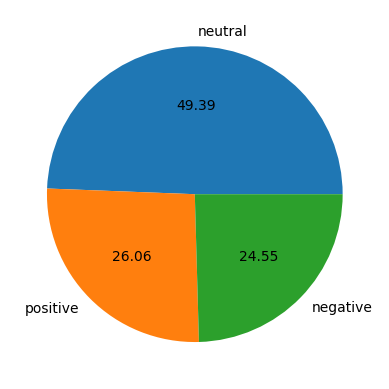

In [ ]:
import matplotlib.pyplot as plt
plt.pie(d['sentiment'].value_counts(), labels=['neutral','positive','negative'],autopct="%0.2f")
plt.show()

In [ ]:
d.describe()

,sentiment
count,22478.000000
mean,4.924593
std,3.556453
min,0.000000
25%,0.000000
50%,5.000000
75%,5.000000
max,10.000000


In [ ]:
import seaborn as sns

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
print(d['selected_text'].dtype)

object


In [ ]:
d['selected_text'] = d['selected_text'].astype(str)
d['stemmed_content']=d['selected_text'].apply(transform_text)

In [ ]:
d.head()

,selected_text,sentiment,stemmed_content
0,"I`d have responded, if I were going",5,respond go
1,Sooo SAD,0,sooo sad
2,bullying me,0,bulli
3,leave me alone,0,leav alon
4,"Sons of ****,",0,son


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(d[d['sentiment'] == 10]['stemmed_content'].str.cat(sep=" "))

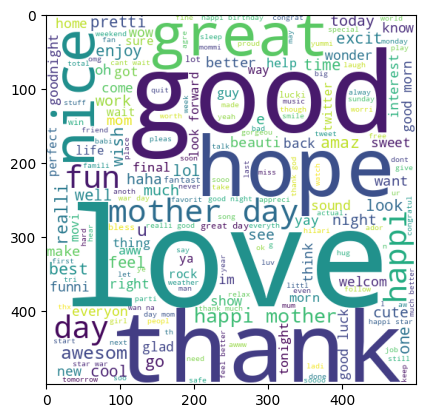

In [ ]:

plt.imshow(spam_wc)

In [ ]:
spam_wc = wc.generate(d[d['sentiment'] == 5]['stemmed_content'].str.cat(sep=" "))

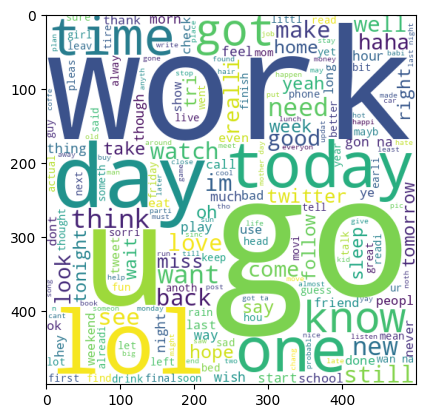

In [ ]:
plt.imshow(spam_wc)

In [ ]:
spam_wc = wc.generate(d[d['sentiment'] == 0]['stemmed_content'].str.cat(sep=" "))

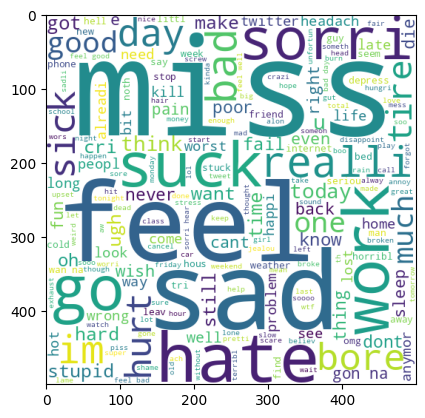

In [ ]:
plt.imshow(spam_wc)

In [ ]:
x=d['stemmed_content'].values
y=d['sentiment'].values

In [ ]:
print(x)

['respond go' 'sooo sad' 'bulli' ... 'yay good' 'worth'
 'flirt go atg smile yay hug']


In [ ]:
print(y)

[ 5  0  0 ... 10 10  5]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(22478,) (15734,) (6744,)


In [ ]:
print(x_train)

['sun believ' 'glad' 'get bore walk stair' ... 'bless'
 'sorri miss farm today' 'real fun begin']


In [ ]:
print(x_test)

['love' 'love friend drew fun toni'
 'w lot nice peopl live thought alway breed ground' ...
 'realli need skateboard' 'tasti' 'tri figur right']


In [ ]:

vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

# logistic regression

In [ ]:
from  sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
!pip install scikit-learn

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
print("accuracy on training data= ",training_data_accuracy)

accuracy on training data=  0.8568704715901868


In [ ]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print("accuracy on testing data= ",testing_data_accuracy)

accuracy on testing data=  0.747479240806643


In [ ]:
print(confusion_matrix(y_test,x_test_prediction))

[[ 991  644  122]
 [ 214 2947  170]
 [  90  463 1103]]


Text(50.722222222222214, 0.5, 'Truth')

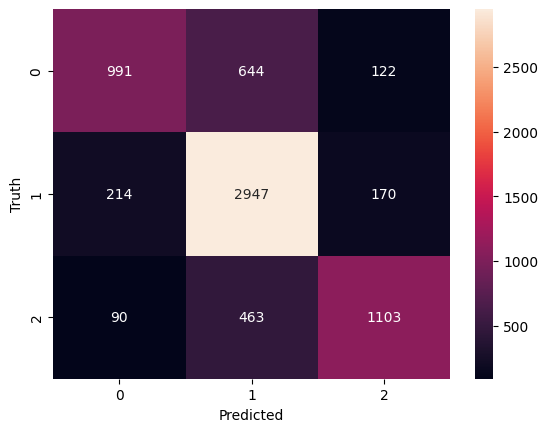

In [ ]:

cm=confusion_matrix(y_test,x_test_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test_prediction, average="macro"))

0.7609561093288834


# naive bayes

In [ ]:
x_train = x_train.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:

x_train2_prediction=gnb.predict(x_train)
training2_data_accuracy=accuracy_score(y_train,x_train2_prediction)

In [ ]:
print("accuracy on training data= ",training2_data_accuracy)

accuracy on training data=  0.7357950934282446


In [ ]:
x_test = x_test.toarray()

In [ ]:
x_test2_prediction=gnb.predict(x_test)
testing2_data_accuracy=accuracy_score(y_test,x_test2_prediction)

In [ ]:
print("accuracy on training data= ",testing2_data_accuracy)

accuracy on training data=  0.5231316725978647


In [ ]:
print(confusion_matrix(y_test,x_test2_prediction))

[[ 655  239  863]
 [ 573 1528 1230]
 [  99  212 1345]]


Text(50.722222222222214, 0.5, 'Truth')

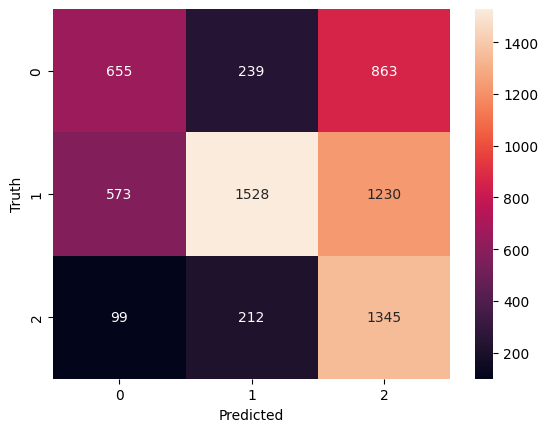

In [ ]:
cm=confusion_matrix(y_test,x_test2_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test2_prediction, average="macro"))

0.5523058407303624


In [ ]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
x_train3_prediction=mnb.predict(x_train)
training3_data_accuracy=accuracy_score(y_train,x_train3_prediction)

In [ ]:
print("accuracy on training data= ",training3_data_accuracy)

accuracy on training data=  0.7952205415024787


In [ ]:
x_test3_prediction=mnb.predict(x_test)
testing3_data_accuracy=accuracy_score(y_test,x_test3_prediction)

In [ ]:
print("accuracy on training data= ",testing3_data_accuracy)

accuracy on training data=  0.7112989323843416


In [ ]:
print(confusion_matrix(y_test,x_test3_prediction))

[[ 741  940   76]
 [  83 3175   73]
 [  41  734  881]]


Text(50.722222222222214, 0.5, 'Truth')

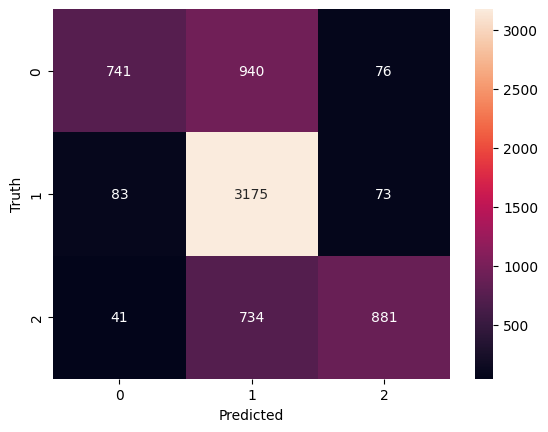

In [ ]:
cm=confusion_matrix(y_test,x_test3_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test3_prediction, average="macro"))

0.7889204616375075


In [ ]:
bnb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
x_train5_prediction=bnb.predict(x_train)
training5_data_accuracy=accuracy_score(y_train,x_train5_prediction)

In [ ]:
print("accuracy on training data= ",training5_data_accuracy)

accuracy on training data=  0.8158128892843524


In [ ]:
x_test5_prediction=bnb.predict(x_test)
testing5_data_accuracy=accuracy_score(y_test,x_test5_prediction)

In [ ]:
print("accuracy on testing data= ",testing5_data_accuracy)

accuracy on testing data=  0.7419928825622776


In [ ]:
print(confusion_matrix(y_test,x_test5_prediction))

[[1292  322  143]
 [ 503 2531  297]
 [ 228  247 1181]]


Text(50.722222222222214, 0.5, 'Truth')

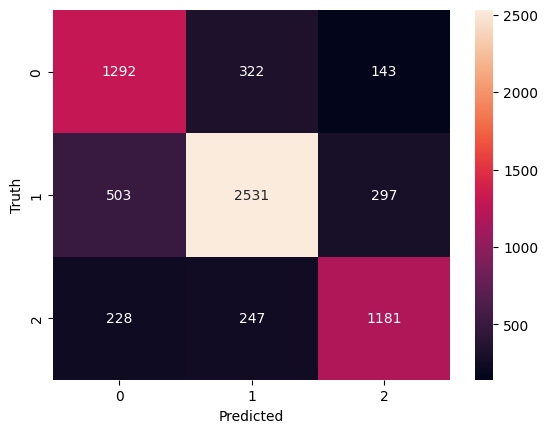

In [ ]:
cm=confusion_matrix(y_test,x_test5_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test5_prediction, average="macro"))

0.7278898969191466


# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
x_train6_prediction=clf.predict(x_train)

In [ ]:
print("accuracy on training data= ",accuracy_score(y_train,x_train6_prediction))

accuracy on training data=  0.9749586881911784


In [ ]:
x_test6_prediction=clf.predict(x_test)
testing6_data_accuracy=accuracy_score(y_test,x_test6_prediction)

In [ ]:
print("accuracy on testing data= ",testing6_data_accuracy)

accuracy on testing data=  0.7415480427046264


In [ ]:
print(confusion_matrix(y_test,x_test6_prediction))

[[ 967  644  146]
 [ 216 2938  177]
 [  94  466 1096]]


Text(50.722222222222214, 0.5, 'Truth')

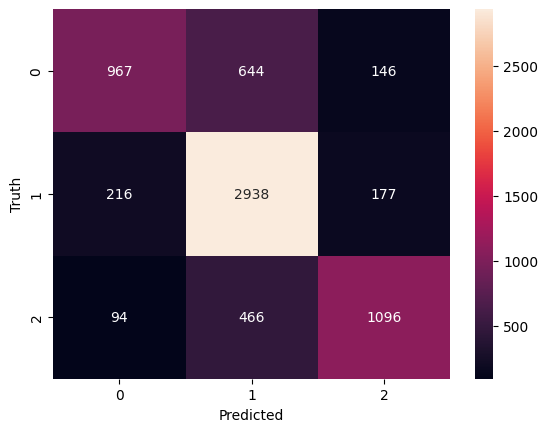

In [ ]:
cm=confusion_matrix(y_test,x_test6_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test6_prediction, average="macro"))

0.751802988429866


# svm

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
c = svm.SVC(kernel='linear')
c.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train7_prediction=c.predict(x_train)

In [ ]:
print("accuracy on training data= ",accuracy_score(y_train,x_train7_prediction))

accuracy on training data=  0.8735223083767637


In [ ]:
x_test7_prediction=c.predict(x_test)
testing7_data_accuracy=accuracy_score(y_test,x_test7_prediction)

In [ ]:
print("accuracy on testing data= ",testing7_data_accuracy)

accuracy on testing data=  0.7501482799525504


In [ ]:
print(confusion_matrix(y_test,x_test7_prediction))

[[1008  619  130]
 [ 226 2914  191]
 [  95  424 1137]]


Text(50.722222222222214, 0.5, 'Truth')

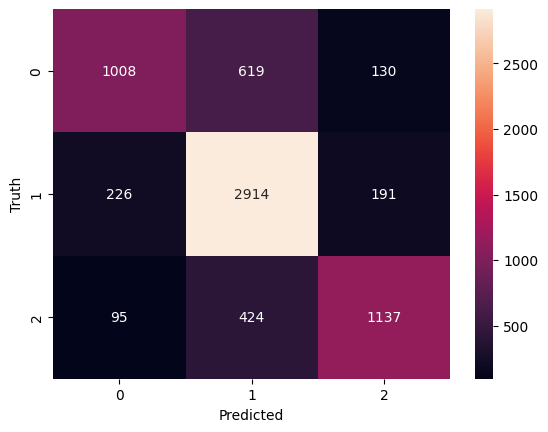

In [ ]:
cm=confusion_matrix(y_test,x_test7_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test7_prediction, average="macro"))

0.7582389597874407


# balanced bagging classifier

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)
x_test8_prediction = classifier.predict(x_test)

In [ ]:
testing8_data_accuracy=accuracy_score(y_test,x_test8_prediction)

In [ ]:
print("accuracy on testing data= ",testing8_data_accuracy)

accuracy on testing data=  0.7222716488730724


Text(50.722222222222214, 0.5, 'Truth')

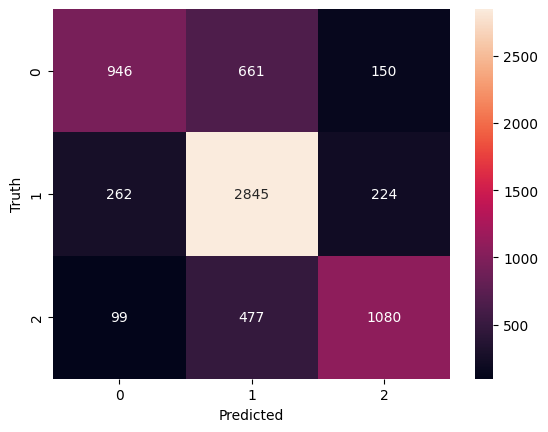

In [ ]:
cm=confusion_matrix(y_test,x_test8_prediction)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(precision_score(y_test,x_test8_prediction, average="macro"))

0.7269530688355785


In [ ]:
#import pickle

In [ ]:
#filename='bnb'
#pickle.dump(bnb,open(filename,'wb'))

In [ ]:
# pickle.dump(vectorizer,open('vectorizer1.pkl','wb'))

# campare

In [ ]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, x_test_prediction))
print("\nClassification Report for GaussianNB:")
print(classification_report(y_test, x_test2_prediction))

print("\nClassification Report for MultinomialNB:")
print(classification_report(y_test, x_test3_prediction))

print("\nClassification Report for BernoulliNB:")
print(classification_report(y_test,x_test5_prediction))

print("\nClassification Report for Random forest:")
print(classification_report(y_test, x_test6_prediction))

print("\nClassification Report for SVM:")
print(classification_report(y_test, x_test7_prediction))

print("\nClassification Report for BalancedBaggingClassifier:")
print(classification_report(y_test, x_test8_prediction))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      1757
           5       0.73      0.88      0.80      3331
          10       0.79      0.67      0.72      1656

    accuracy                           0.75      6744
   macro avg       0.76      0.70      0.72      6744
weighted avg       0.75      0.75      0.74      6744


Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.49      0.37      0.42      1757
           5       0.77      0.46      0.58      3331
          10       0.39      0.81      0.53      1656

    accuracy                           0.52      6744
   macro avg       0.55      0.55      0.51      6744
weighted avg       0.61      0.52      0.52      6744


Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.86      0.42      0.57      1757
 

In [ ]:
from sklearn.metrics import roc_curve, auc
